# Iris Flower Classification

In [1037]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

from sklearn import datasets
# Used for scaling a dataset
from sklearn.preprocessing import MinMaxScaler

In [1038]:
# Load an iris flower dataset
data = datasets.load_iris()

data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

## Data wrangling

In [1039]:
# Create a data frame with dataset feature names as its columns
df = pd.DataFrame(data.data, columns = data.feature_names)

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [1040]:
# Scale datapoints between 0 and 1
# (i.e. make smallest value 0 and largest value 1)

scaler = MinMaxScaler()
# Fit the scaler to the data frame
scaler.fit(df)
# Make the scaled data
scaled = scaler.fit_transform(df)

scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [1041]:
# Turn it into a data frame again
scaled_df = pd.DataFrame(scaled, columns = df.columns)

scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [1042]:
# Add a new column to the data frame with values from the original dataset
# Target indicates the iris species (here: target names)
scaled_df["target"] = data.target

scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0
...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2
146,0.555556,0.208333,0.677966,0.750000,2
147,0.611111,0.416667,0.711864,0.791667,2
148,0.527778,0.583333,0.745763,0.916667,2


In [1043]:
# We want the targets to be shown as the actual target names (setosa, versicolor, virginica),
# so we map the integers (0, 1, 2) to the target names
# The zip function pairs 0 with data.target_names[0], 1 with data.target_names[1], and 2 with data.target_names[2]
# Finally, wrap the whole thing in a dictionary
target_dict = dict(zip([0, 1, 2], data.target_names))

target_dict

{0: np.str_('setosa'), 1: np.str_('versicolor'), 2: np.str_('virginica')}

In [1044]:
# Map the dictionary to the target column
scaled_df["target_name"] = scaled_df["target"].map(target_dict)

scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,0.222222,0.625000,0.067797,0.041667,0,setosa
1,0.166667,0.416667,0.067797,0.041667,0,setosa
2,0.111111,0.500000,0.050847,0.041667,0,setosa
3,0.083333,0.458333,0.084746,0.041667,0,setosa
4,0.194444,0.666667,0.067797,0.041667,0,setosa
...,...,...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667,2,virginica
146,0.555556,0.208333,0.677966,0.750000,2,virginica
147,0.611111,0.416667,0.711864,0.791667,2,virginica
148,0.527778,0.583333,0.745763,0.916667,2,virginica


## Pie chart

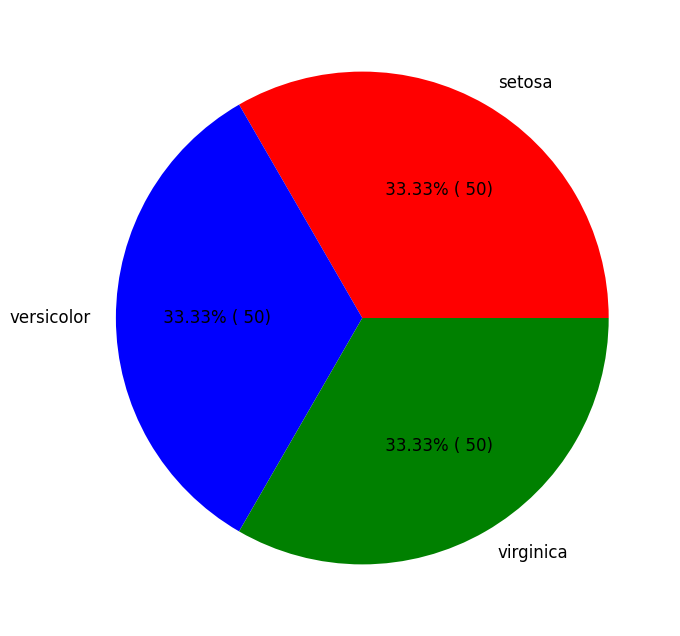

In [1045]:
# Change figure size to 8 by 8
plt.figure(figsize = (8, 8))
# Create a pie chart
# value_counts() counts each unique value in the target column
# The unique values are 0, 1, and 2, so 3 total (i.e. make a 3-part pie chart)
# Also set labels, text style, and colors
plt.pie(scaled_df.target.value_counts(), labels = data.target_names, textprops = {"fontsize": 12}, colors = ["r", "b", "g"],
        # Autopercent will show us percentage values
        # We're using a lambda (anonymous) function here
        # x as its argument, returns a formatted string
        # The string is made up of a 2-point floating point (2 decimals) and a 0-point floating point (0 decimals)
        # The first floating point will tell us what's the percentage of each unique value out of all data points
        # The second one will indicate the actual number of the unique value
        autopct = lambda x: "{p: .2f}% ({v: .0f})".format(p = x, v = x * len(scaled_df) / 100))

plt.show()

In [1046]:
# Group by target_name column (i.e. make a row for every unique value: setosa, versicolor, and virginica)
# and show means of values of the other (numeric) columns
means = scaled_df.groupby(["target_name"]).mean()

# Remove unnecessary target column
means = means.drop("target", axis = 1)

means


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target_name,,,,
setosa,0.196111,0.595000,0.078305,0.060833
versicolor,0.454444,0.320833,0.552542,0.510833
virginica,0.635556,0.405833,0.771525,0.802500


## Bar chart

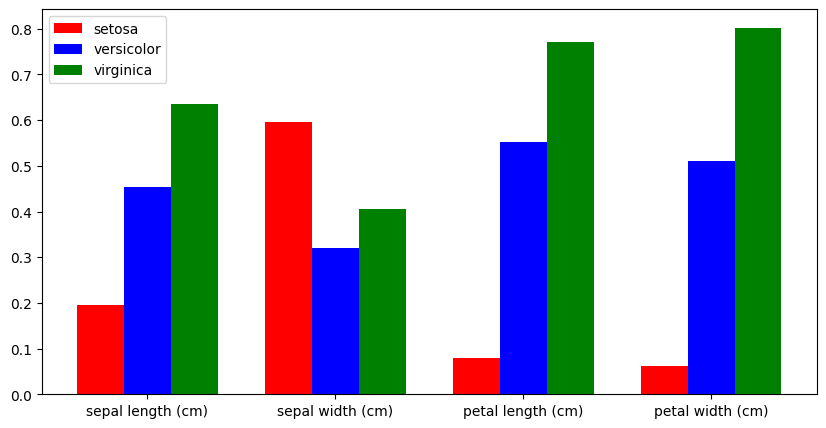

In [1047]:
# Column names from the previous data frame
features = means.columns
# X-axis is divided into 4 
x_axis = np.array([1, 2, 3, 4])
# Set means data frame values as y-axis values
y_axis = means.values

plt.figure(figsize = (10, 5))
# Create three different bar charts in the same figure
# (i.e. show three bars on each x-axis value)
# Offset (- .25 and + .25) the charts to prevent them overlapping with each other
plt.bar(x_axis - .25, y_axis[0], width = .25, color = "r")
plt.bar(x_axis, y_axis[1], width = .25, color = "b")
plt.bar(x_axis + .25, y_axis[2], width = .25, color = "g")
# Name the x-axis values as the features (sepal length (cm), sepal width (cm), etc.)
plt.xticks(x_axis, features)
# Show a legend on the chart
plt.legend(data.target_names)

plt.show()

# Graphs

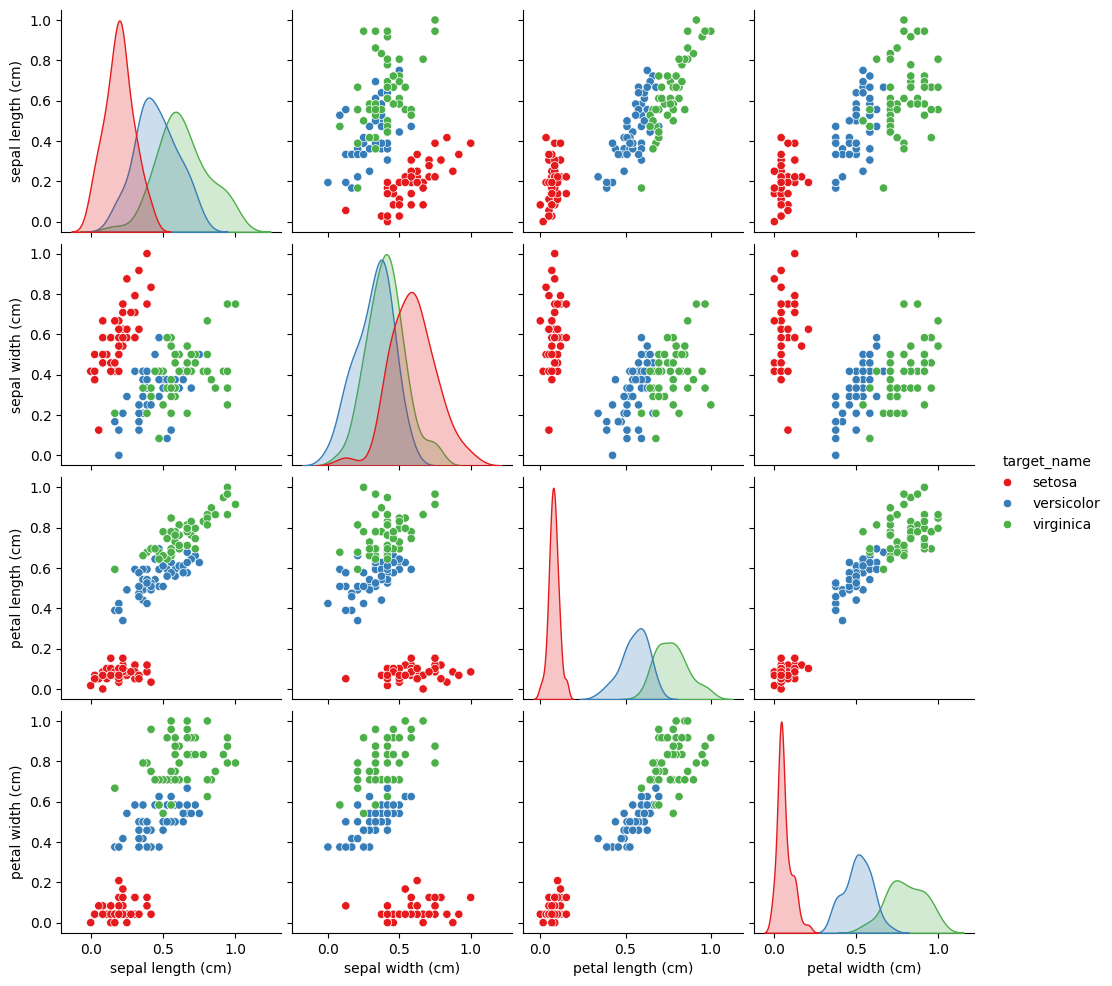

In [1048]:
# Graph features by features (i.e. pairwise relationships)
# Note that the second to last column (target) is omitted
# Colors (hue) of the data points are set to respective target names
# Use a specific color palette
sns.pairplot(scaled_df[scaled_df.columns[[0, 1, 2, 3, 5]]], hue = "target_name", palette = "Set1")

plt.show() # Seaborn uses Matplotlib in the background

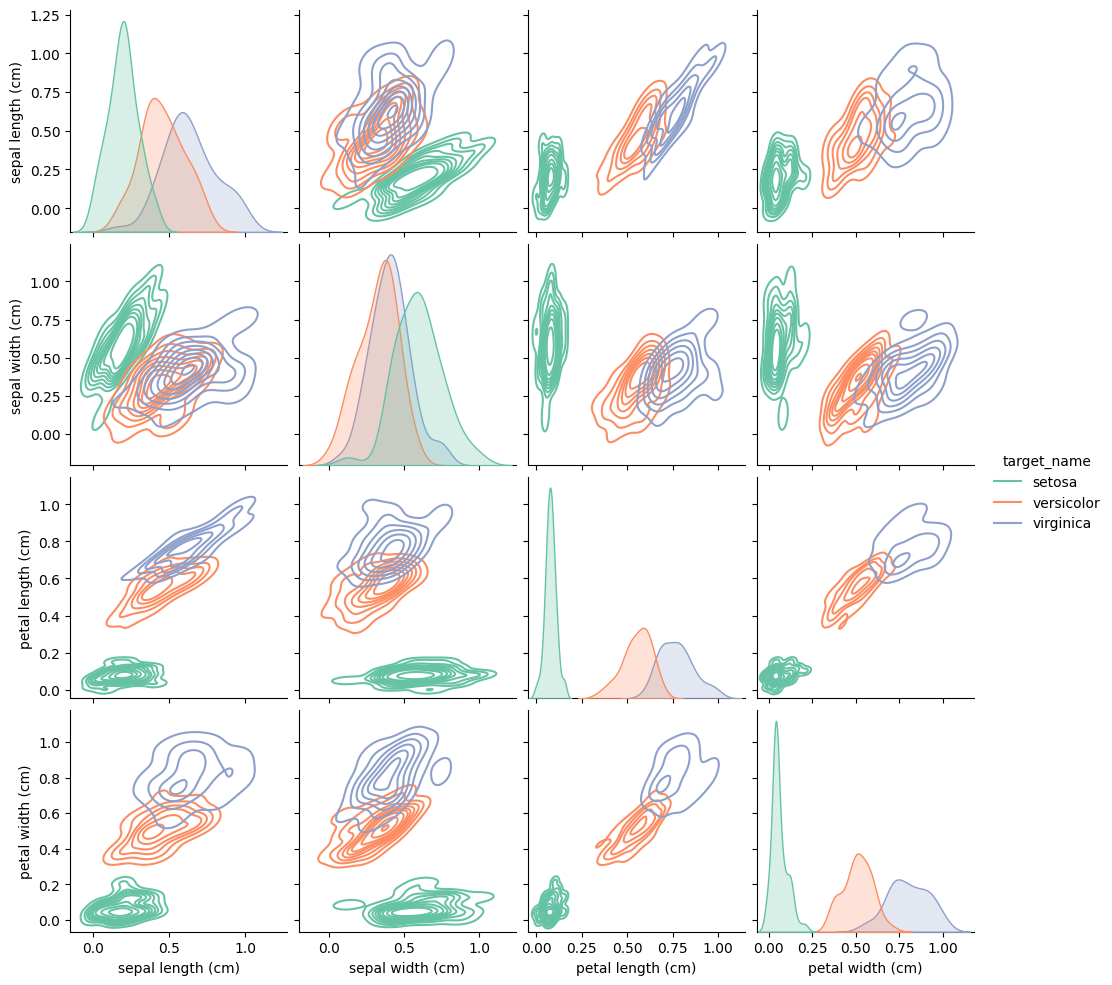

In [1049]:
# Change graph type by adding kind argument with value kde; alternatives are scatter (default), hist, reg
# Kde means kernel density
# Also change the color palette
sns.pairplot(scaled_df[scaled_df.columns[[0, 1, 2, 3, 5]]], hue = "target_name", palette = "Set2", kind = "kde")

plt.show()

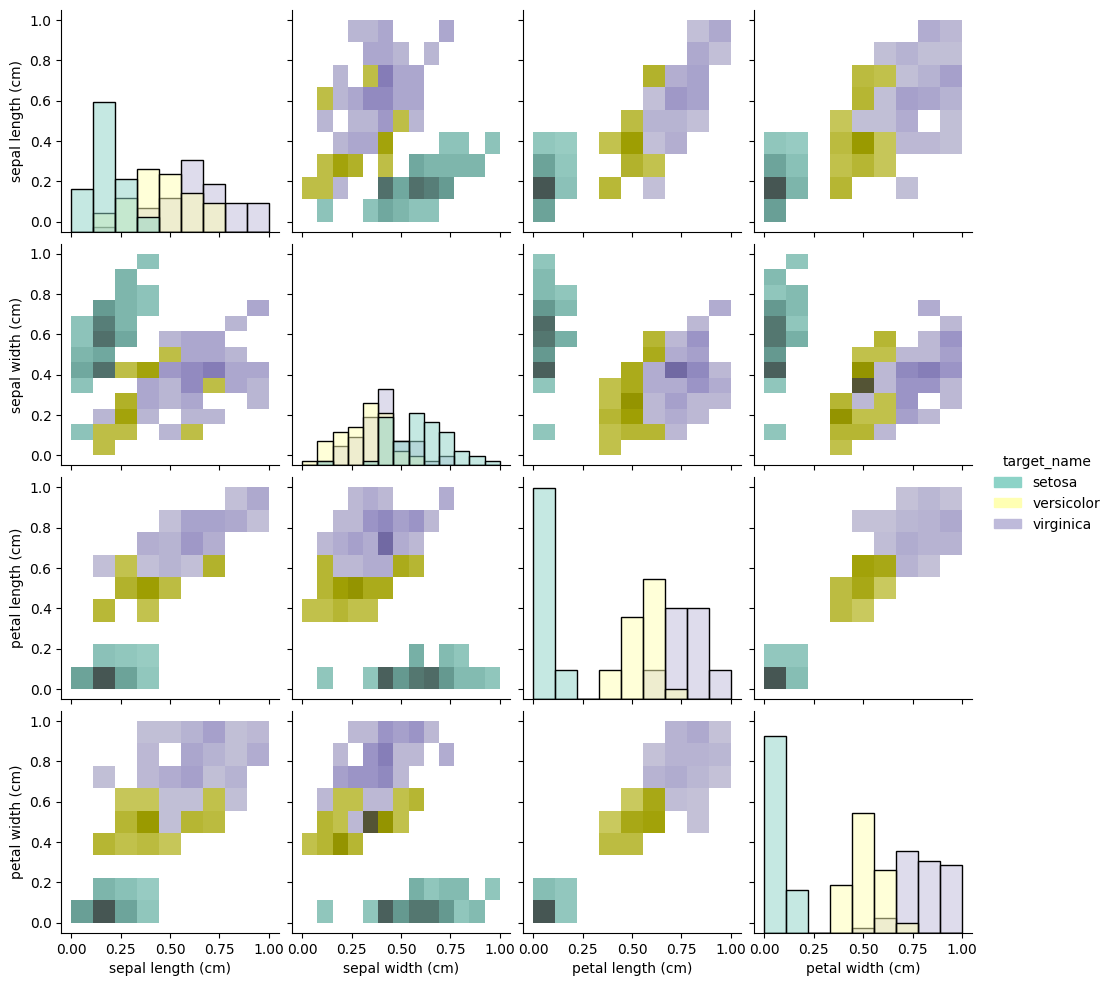

In [1050]:
# Kind with value hist (histogram)
sns.pairplot(scaled_df[scaled_df.columns[[0, 1, 2, 3, 5]]], hue = "target_name", palette = "Set3", kind = "hist")

plt.show()

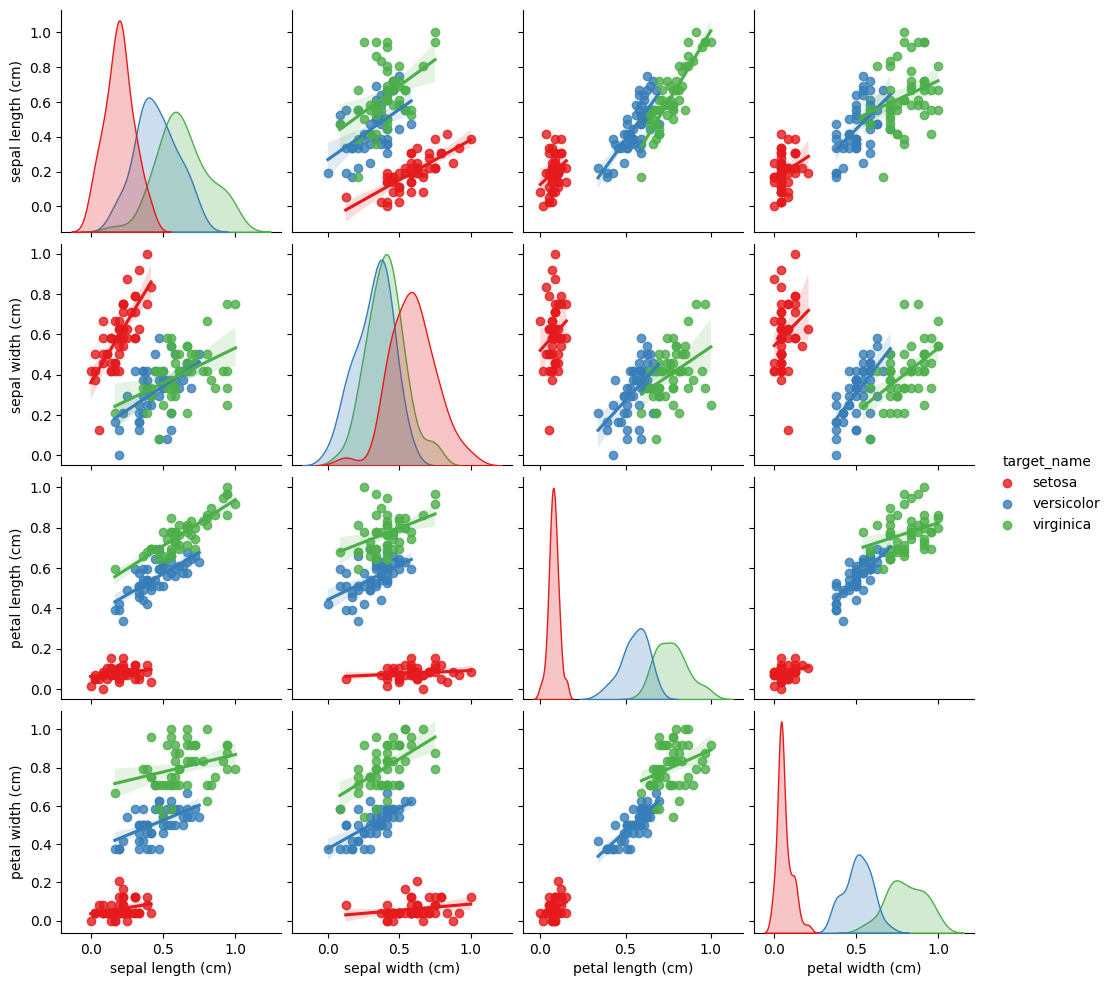

In [1051]:
# With reg (regression)
sns.pairplot(scaled_df[scaled_df.columns[[0, 1, 2, 3, 5]]], hue = "target_name", palette = "Set1", kind = "reg")

plt.show()